In [ ]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/neo-stark-team/Datasets/main/Mall_Customers.csv")

In [ ]:
data

,CustomerID,Gender,Age,Annual_Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
data.columns = ["CustomerID",
                "Gender",
                "Age",
                "Annual_Income",
                "Spending Score"
                ]

In [ ]:
data.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending Score    0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


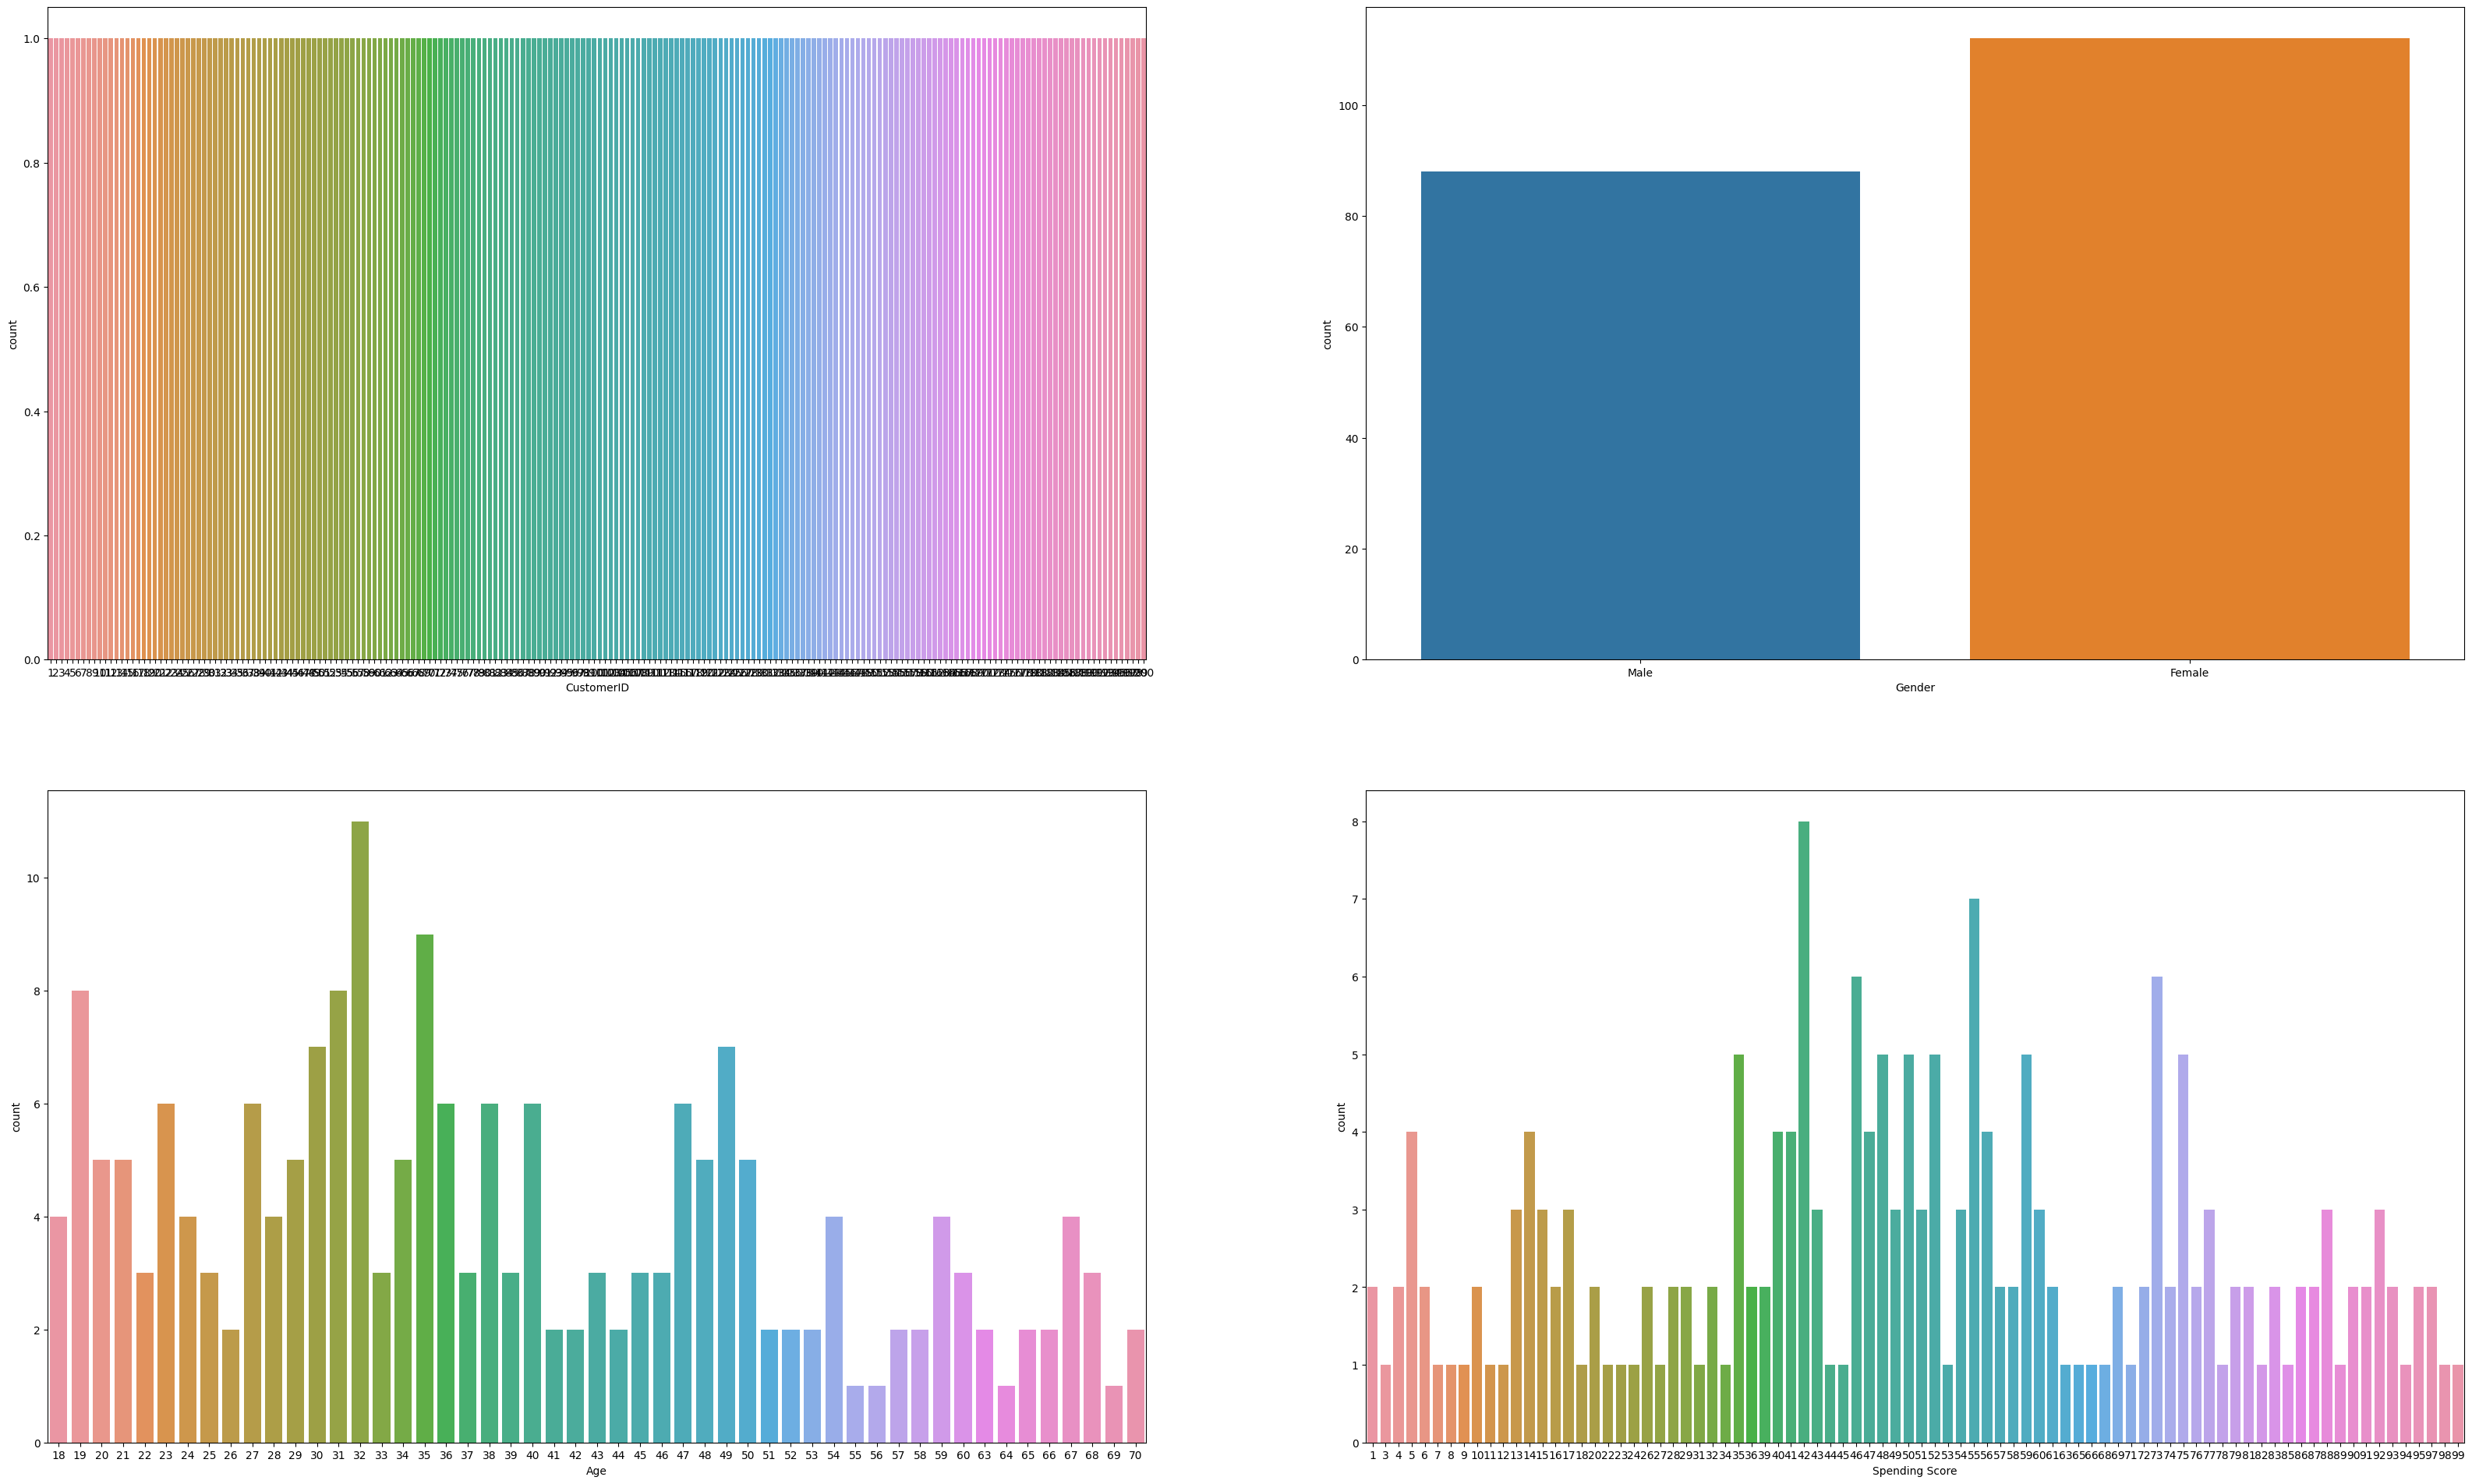

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
x = data.drop("Annual_Income",axis=1)
plt.figure(figsize=(40,50))
for i, col in enumerate(x,1):
  plt.subplot(4,2,i)
  sns.countplot(data = data,x = col)
  plt.xlabel(col)
  plt.ylabel('count')
plt.show()

In [ ]:
import plotly.express as px

long_df = px.data.medals_long()

fig = px.bar(long_df, x="Gender", y="Annual_Income", color="medal", title="Long-Form Input")
fig.show()

ValueError: ignored

In [ ]:
#Outliers
Q3 = data.Annual_Income.quantile(.75)
Q3

78.0

In [ ]:
Q1 = data.Annual_Income.quantile(.25)
Q1

41.5

In [ ]:
IQR_value = Q3 - Q1
IQR_value

36.5

In [ ]:
l = Q1 - 1.5*IQR_value
l

-13.25

In [ ]:
U = Q3 + 1.5*IQR_value
U

132.75

In [ ]:
a = (data.Annual_Income<l)|(data.Annual_Income>U)
a

0      False
1      False
2      False
3      False
4      False
       ...  
193    False
194    False
195    False
196    False
197    False
Name: Annual_Income, Length: 198, dtype: bool

In [ ]:
data = data[~(a)]
data

,CustomerID,Gender,Age,Annual_Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28


<ipython-input-31-0bea9f6ce450>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


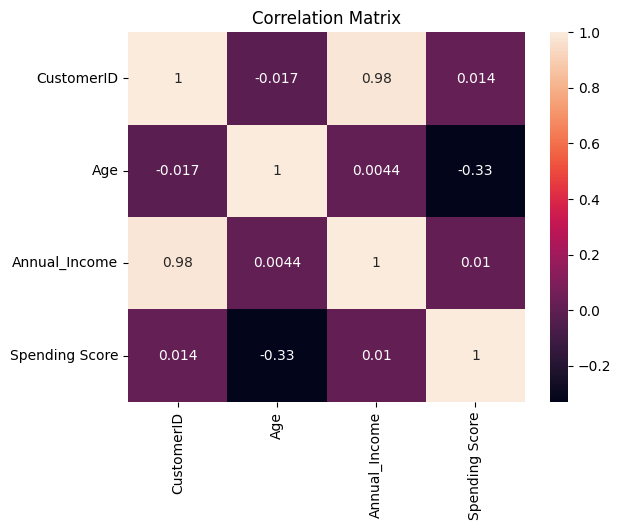

In [ ]:
correlation = data.corr()
sns.heatmap(correlation,annot = True)
plt.title("Correlation Matrix")
plt.show()

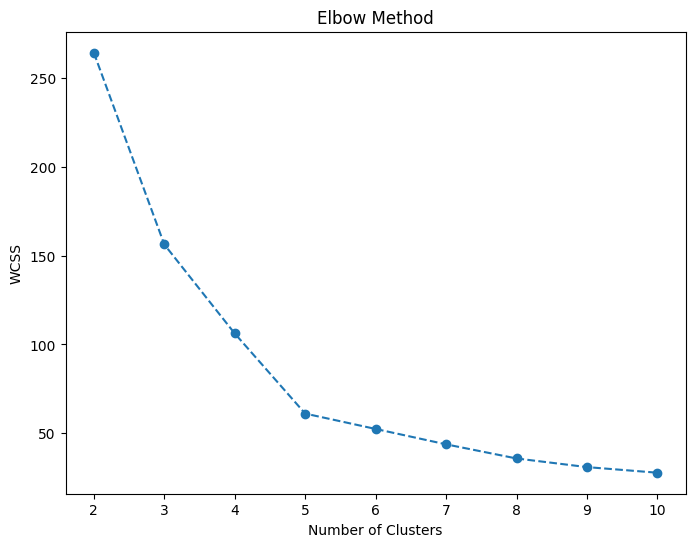

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
x = data[["Annual_Income","Spending Score"]]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
wcss = []
for i in range(2,11):
  kmeans = KMeans(n_clusters = i,init = "k-means++",max_iter = 300,n_init = 10,random_state = 0)
  kmeans.fit(x_scaled)
  wcss.append(kmeans.inertia_)

plt.figure(figsize =(8,6))
plt.plot(range(2,11),wcss,marker = "o",linestyle = "--")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


In [ ]:
#kmeans = KMeans(n_clusters=5,init="k_means++",max_iter = 300,n_init = 10,random_state = 1)
#kmeans.fit(x_scaled)
data["Cluster"] = kmeans.labels_
data

<ipython-input-18-e998a848bf51>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Cluster"] = kmeans.labels_


,CustomerID,Gender,Age,Annual_Income,Spending Score,Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
193,194,Female,38,113,91,2
194,195,Female,47,120,16,6
195,196,Female,35,120,79,2
196,197,Female,45,126,28,6


In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(x,kmeans.labels_)
print("Avg Score:",silhouette_avg)

Avg Score: 0.4516385424717057


In [ ]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters = 5,affinity = "euclidean",linkage = "ward")
